In [16]:
from sklearn.cluster import KMeans
import numpy as np

import os

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from keras.models import Model
from keras.layers import Input, Dense, concatenate, Dropout
from keras.optimizers import SGD, Adam

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

import uproot

In [17]:
def  get_input_arrays(tree, features_list):
    array = np.transpose(tree.arrays(features_list, outputtype=tuple))
    print(array.shape)
    print(array[0])
    return array

In [18]:
dataDir = '../data/'

In [19]:
tree = uproot.open(dataDir+'oneNewKINNW_MC16e.root')[b'features;2']

In [35]:
#tree.keys()

In [27]:
spin_list = [b'c_nn',
 b'NW_c_nn',
 b'KIN_c_nn']

In [30]:
c_nn = get_input_arrays(tree, [b'c_nn'])
NW_c_nn = get_input_arrays(tree, [b'NW_c_nn'])
KIN_c_nn = get_input_arrays(tree, [b'KIN_c_nn'])

(55846, 1)
[-0.22836393]
(55846, 1)
[-0.45447155]
(55846, 1)
[-0.27665773]


In [22]:
NW_array = get_input_arrays(tree, [b'NW_top_pt',
 b'NW_top_eta',
 b'NW_top_phi',
 b'NW_tbar_pt',
 b'NW_tbar_eta',
 b'NW_tbar_phi',
 b'NW_top_m',
 b'NW_tbar_m',
 b'NW_b_pt',
 b'NW_b_eta',
 b'NW_b_phi',
 b'NW_bbar_pt',
 b'NW_bbar_eta',
 b'NW_bbar_phi',
 b'NW_b_e',
 b'NW_bbar_e',
 b'NW_nu_pt',
 b'NW_nu_eta',
 b'NW_nu_phi',
 b'NW_nubar_pt',
 b'NW_nubar_eta',
 b'NW_nubar_phi',
 b'NW_nu_e',
 b'NW_nubar_e',
 b'NW_top_delta_phi',
 b'NW_top_delta_eta',
 b'NW_b_delta_phi',
 b'NW_b_delta_eta',])

(55846, 28)
[ 7.54347812e+04 -5.17109521e-02 -4.77359116e-01  8.75067109e+04
 -2.26317406e+00 -2.83609891e+00  1.71500000e+05  1.73000000e+05
  5.45543008e+04 -5.26064336e-01  1.06392336e+00  4.56552266e+04
 -3.97971272e-01 -2.24426079e+00  6.26892344e+04  4.97519258e+04
  1.90646367e+04  1.60000002e+00 -9.17833567e-01  5.30639414e+04
 -2.00000000e+00  2.14039230e+00  4.91384200e+07  1.99636922e+05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [23]:
KIN_array = get_input_arrays(tree, [b'KIN_top_pt',
 b'KIN_top_eta',
 b'KIN_top_phi',
 b'KIN_tbar_pt',
 b'KIN_tbar_eta',
 b'KIN_tbar_phi',
 b'KIN_top_m',
 b'KIN_tbar_m',
 b'KIN_b_pt',
 b'KIN_b_eta',
 b'KIN_b_phi',
 b'KIN_bbar_pt',
 b'KIN_bbar_eta',
 b'KIN_bbar_phi',
 b'KIN_b_e',
 b'KIN_bbar_e',
 b'KIN_nu_pt',
 b'KIN_nu_eta',
 b'KIN_nu_phi',
 b'KIN_nubar_pt',
 b'KIN_nubar_eta',
 b'KIN_nubar_phi',
 b'KIN_nu_e',
 b'KIN_nubar_e',
 b'KIN_top_delta_phi',
 b'KIN_top_delta_eta',
 b'KIN_b_delta_phi',
 b'KIN_b_delta_eta',])

(55846, 28)
[ 6.20062930e+04 -6.86000049e-01  2.60091007e-01  7.55591328e+04
 -2.18124580e+00 -2.55748630e+00  1.72500047e+05  1.72500016e+05
  4.16313828e+04 -5.26064336e-01  1.06392336e+00  5.11211914e+04
 -3.97971272e-01 -2.24426079e+00  4.78393008e+04  5.57083594e+04
  1.59768418e+04  9.11159575e-01  2.04955482e+00  3.80715820e+04
 -1.71211243e+00  1.60276055e+00  2.30806465e+04  1.08906367e+05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]


In [31]:
def make_labels(recoSpin, trueSpin):
    
    labels = np.zeros(len(recoSpin))
    
    good = np.where(np.abs(recoSpin - trueSpin) < 0.2)[0]
    
    labels[good] = 1
    
    return labels

In [38]:
labels = make_labels(NW_c_nn, c_nn)

In [37]:
data = get_input_arrays(tree, [b'reco_met',
 b'reco_met_phi',
 b'reco_lep_p_pt',
 b'reco_lep_p_eta',
 b'reco_lep_p_phi',
 b'reco_lep_p_e',
 b'reco_lep_n_pt',
 b'reco_lep_n_eta',
 b'reco_lep_n_phi',
 b'reco_lep_n_e',
 b'reco_jet_0_pt',
 b'reco_jet_0_eta',
 b'reco_jet_0_phi',
 b'reco_jet_0_e',
 b'reco_bjet_0_e',
 b'reco_jet_1_pt',
 b'reco_jet_1_eta',
 b'reco_jet_1_phi',
 b'reco_jet_1_e',
 b'reco_bjet_1_e',
 b'reco_jet_2_pt',
 b'reco_jet_2_eta',
 b'reco_jet_2_phi',
 b'reco_jet_2_e',
 b'reco_bjet_2_e',
 b'reco_njets',
 b'reco_lep_delta_phi',
 b'reco_lep_delta_eta',])

(55846, 28)
[ 7.04442031e+04  1.97376204e+00  7.32048281e+04 -2.58735389e-01
 -1.16389930e+00  7.56689141e+04  4.40991406e+04 -2.24167752e+00
 -2.21246004e+00  2.09810094e+05  5.11211914e+04 -3.97971272e-01
 -2.24426079e+00  5.57083594e+04 -6.31833434e-01  4.16313828e+04
 -5.26064336e-01  1.06392336e+00  4.78393008e+04 -8.97042930e-01
  3.50282070e+04  4.95823473e-01  7.02036977e-01  3.97163633e+04
 -8.99980068e-01  3.00000000e+00  0.00000000e+00  0.00000000e+00]


In [39]:
#data  = NW_array

#labels  = np.concatenate((np.ones(10000),np.zeros(10000)))

data = shuffle(data)
labels = shuffle(labels)
#x_train  = spin_array

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data, labels)

In [41]:
transformer = RobustScaler()
x_train_scaled = transformer.fit_transform(x_train)
print(x_train_scaled.shape)

(41884, 28)


In [42]:
def model_D(input_n):
    # Discriminant
    D_input = Input(shape=(input_n,), name="dnn_input")

    x = Dense(256, activation="relu")(D_input)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(64, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation="relu")(x)
    x = Dropout(0.2)(x)
    x = Dense(1, activation="sigmoid")(x)

    return Model(D_input, x)

In [43]:
D = model_D(x_train.shape[1])
D_sgd = SGD(lr=0.01, decay=1e-8, momentum=0.0, nesterov=False)
#D.compile(optimizer="adam", loss="binary_crossentropy")
D.compile(optimizer=D_sgd, loss="binary_crossentropy", metrics=["accuracy"])

In [59]:
D.fit(x_train_scaled,y_train,epochs=15)

Epoch 1/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6883 - accuracy: 0.5495
Epoch 2/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6882 - accuracy: 0.5496
Epoch 3/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6883 - accuracy: 0.5499
Epoch 4/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6883 - accuracy: 0.5497
Epoch 5/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6882 - accuracy: 0.5501
Epoch 6/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6881 - accuracy: 0.5496
Epoch 7/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6882 - accuracy: 0.5499
Epoch 8/15
1309/1309 [==============================] - 2s 2ms/step - loss: 0.6882 - accuracy: 0.5499
Epoch 9/15
1309/1309 [==============================] - 2s 1ms/step - loss: 0.6880 - accuracy: 0.5498
Epoch 10/15
1309/1309 [==============================] - 2s 2ms/step - loss: 0.688

In [45]:
x_test_scaled = transformer.transform(x_test)
print(x_test.shape)

(13962, 28)


In [46]:
y_pred = D.predict(x_test)

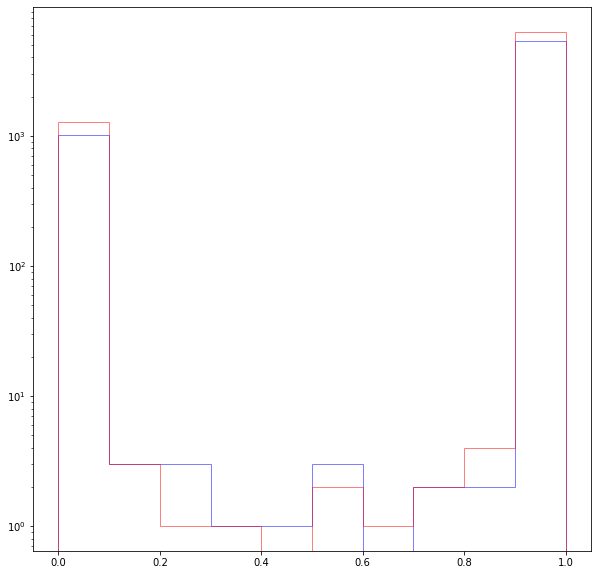

In [58]:
fig,ax = plt.subplots(figsize=(10,10))
ax.set_yscale('log')
_=plt.hist(y_pred[np.where(y_test == 0)[0]],bins=10,alpha=0.5,histtype='step',color='blue')
_=plt.hist(y_pred[np.where(y_test == 1)[0]],bins=10,alpha=0.5,histtype='step',color='red')